In [2]:
import pandas as pd
df_t = pd.read_csv('Travel Pony Facebook.csv')
# load csv document to df_t 

In [3]:
for i in range(len(df_t)):
    if df_t['Amount Spent (USD)'][i] == 0:
        df_t = df_t.drop(i)
len(df_t)
# where to drop amount spend equals zero

1802

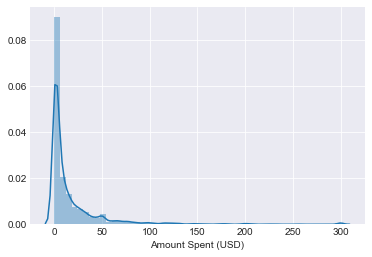

In [4]:
import seaborn as sns
%matplotlib inline  
sns.set_style('darkgrid')
sns.distplot(df_t['Amount Spent (USD)'])
# get the graph

problem 2

In [5]:
for i in range(len(df_t)):
    if df_t["Campaign Name"].str.contains('cyber',case = False).iloc[i] == True:
        df_t["Campaign Name"].iloc[i] = "Cyber" 
##############match any rows contains Cyber
    elif df_t["Campaign Name"].str.contains('TravelPony',case = False).iloc[i] == True:
        df_t["Campaign Name"].iloc[i]  = "TravelPony"

    elif df_t["Campaign Name"].str.contains('Nanigans',case = False).iloc[i] == True:
        df_t["Campaign Name"].iloc[i]  = "Nanigans"
###############match any rows contains Nanigans
      
    elif df_t["Campaign Name"].str.contains('Post',case = False).iloc[i] == True:
         df_t["Campaign Name"].iloc[i] = "Post"
###############match any rows contains Post
 
    elif df_t["Campaign Name"].str.contains('Ad',case = False).iloc[i] == True:
         df_t["Campaign Name"].iloc[i] = "Ad"
###############match any rows contains Ad
        
    elif df_t["Campaign Name"].str.contains('Simple_Multi_Fill_Campaign',case = False).iloc[i] == True:
        df_t["Campaign Name"].iloc[i] = "Simple_Multi_Fill_Campaign"

/Users/yifanli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df_tem = pd.get_dummies(df_t['Campaign Name'])
df_t = pd.concat([df_t, df_tem], axis=1)

In [7]:
import statsmodels.api as sm
DV = df_t["Amount Spent (USD)"]
IV = df_t[["Cyber","TravelPony","Nanigans","Post","Ad","Simple_Multi_Fill_Campaign","Reach","Frequency","Impressions","Clicks","Unique Clicks","Page Likes",
               "Page Engagement","Post Engagement","Post Likes","Post Comments","Post Shares","Photo Views","Website Clicks"]]

model = sm.OLS(DV, IV).fit()
predictions = model.predict(IV) # make the predictions by the model

print("this is summary", model.summary())

/Users/yifanli/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


this is summary                             OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Thu, 27 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:59:40   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Cybe

problem 3

In [8]:
############ concat only the parameter 
result = pd.concat([model.params], axis=1)

result['Rank'] = result[0].rank(ascending=0)
print(result)


                                     0  Rank
Cyber                      -193.319513  19.0
TravelPony                    7.292553   3.0
Nanigans                     -2.314978  16.0
Post                        -12.041045  17.0
Ad                            0.166576  10.0
Simple_Multi_Fill_Campaign   -0.064728  13.0
Reach                         0.003310  11.0
Frequency                    -0.777756  15.0
Impressions                  -0.000853  12.0
Clicks                       -0.385926  14.0
Unique Clicks                 0.515465   9.0
Page Likes                   24.450740   1.0
Page Engagement             -21.145054  18.0
Post Engagement              18.024142   2.0
Post Likes                    2.610037   8.0
Post Comments                 3.594876   5.0
Post Shares                   4.933423   4.0
Photo Views                   3.321407   7.0
Website Clicks                3.564398   6.0
